# Task: Implement SVM for classification on the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
# Loading Datasets

iris = datasets.load_iris()

X = iris.data[:, :2]
Y = iris.target

print(" X : \n" , X)
print(" Y : \n" , Y)

 X : 
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5

In [3]:
# Split the dataset into training and testing sets
X_train , X_test , Y_train, Y_test = train_test_split( X , Y , test_size=0.3, random_state=42)

# Create a SVM  classifier
svm = SVC(kernel='linear')
svm

SVC(kernel='linear')

In [4]:
# Train the model
svm.fit(X_train , Y_train)

SVC(kernel='linear')

In [5]:
# Create a mesh grid for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

In [6]:
#predict for each point in the grid

Z=svm.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

In [7]:
# Make Prediction

predictions = svm.predict (X_test)
print(predictions)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]


In [8]:
# Evaluate  the model

accuracy = svm.score(X_test , Y_test)
print(f"Accuracy : {accuracy :.2f}")

Accuracy : 0.80


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

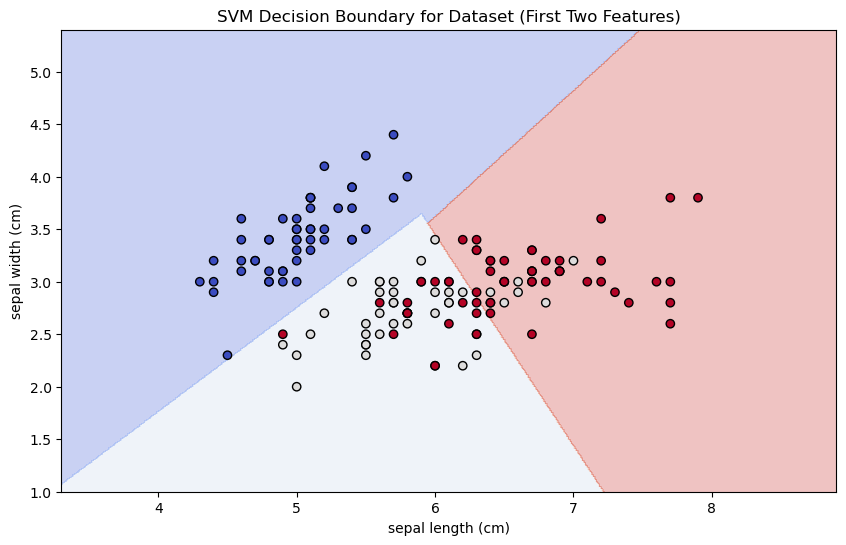

In [11]:
#Plot the decision boundaries 
plt.figure(figsize=(10, 6)) 
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

#Scatter plot of the original data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel(iris.feature_names[0]) 
plt.ylabel(iris.feature_names[1]) 
plt.title("SVM Decision Boundary for Dataset (First Two Features)")
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
plt.show()